Задание №3. Команда 5. Цыпленков А.В. 
31.10.2018

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [321]:
import seaborn as sns

In [322]:
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

label_encoder = LabelEncoder()

In [635]:

df_test = pd.read_csv('C:/Users/lords/Downloads/SkillFactory/HW_lesson_03/HomeTask03/test.csv', sep='\,', encoding='utf8')
df_train = pd.read_csv('C:/Users/lords/Downloads/SkillFactory/HW_lesson_03/HomeTask03/train.csv', sep='\,', encoding='utf8')
df_smpl = pd.read_csv('C:/Users/lords/Downloads/SkillFactory/HW_lesson_03/HomeTask03/sample_submission.csv', sep='\,', encoding='utf8')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys

In [578]:
df_smpl.target.count()

16476

In [325]:
df_test.loc[:, 'target'] = 0

In [326]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [327]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
target            16476 non-null int64
sample      

In [328]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 23 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
sample      

In [329]:
df = df_test.append(df_train).reset_index(drop=True)

In [330]:
df.shape

(41188, 23)

In [609]:
df[(df['sample'] == 'test')].age.count()

16476

In [331]:
df.isnull().sum()

_id               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
sample            0
dtype: int64

In [333]:
df.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0,test
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,test
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,test
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,test
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,test


In [201]:
for i in df.columns: # перебираем все столбцы
    if (str(df[i].dtype) == 'object') & (i != '_id'): # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'services', 'management', 'unemployed', 'blue-collar', 'student', 'housemaid', 'admin.', 'technician', 'entrepreneur', 'retired', 'self-employed', 'unknown'}


marital
{'unknown', 'married', 'divorced', 'single'}


education
{'unknown', 'illiterate', 'basic.6y', 'basic.4y', 'high.school', 'basic.9y', 'professional.course', 'university.degree'}


default
{'unknown', 'yes', 'no'}


housing
{'unknown', 'yes', 'no'}


loan
{'no', 'yes', 'unknown'}


contact
{'telephone', 'cellular'}


month
{'sep', 'dec', 'jun', 'oct', 'nov', 'apr', 'may', 'mar', 'jul', 'aug'}


day_of_week
{'fri', 'thu', 'wed', 'tue', 'mon'}


poutcome
{'failure', 'nonexistent', 'success'}


sample
{'test', 'train'}




In [334]:
def ddivideObj(inDfa):
     
    _df = inDfa.copy()
    
    for i in inDfa.columns: # перебираем все столбцы
        if (str(inDfa[i].dtype) != 'object'): # если тип столбца - not object    
             _df = _df.drop([i], axis = 1)
  
    return _df

In [354]:
def ddivide(inDfa):
    
    _df = inDfa.copy()
    
    for i in inDfa.columns: # перебираем все столбцы
        if (str(inDfa[i].dtype) == 'object'): # если тип столбца - object    & (str(i) != '_id')
            _df = _df.drop([i], axis = 1)

    return _df

In [519]:
def objectTransform(_dIn):

    _df = _dIn.copy()
#    _df = _df.drop(['_id'], axis = 1)

    for i in _dIn.columns: # перебираем все столбцы
        if (str(_dIn[i].dtype) == 'object') & (str(i) != 'sample') & (str(i) != '_id'): # 
            _df = pd.get_dummies(_df, columns=[i])
#            _df[i] = label_encoder.fit_transform(_df[i])
    

    return _df

In [520]:
tdf = ddivideObj(df)
sdf = ddivide(df)

In [521]:
tdf = objectTransform(tdf)

In [522]:
StandardScaler().fit_transform(sdf)

array([[ 1.62899323e+00,  4.34729577e-01, -5.65921974e-01, ...,
        -1.33893884e+00, -9.40280958e-01, -2.69399768e-01],
       [ 1.43707534e+00,  1.03036839e-01, -2.04908526e-01, ...,
         7.14189558e-01,  3.31679907e-01, -2.69399768e-01],
       [-6.74021417e-01, -7.95619068e-01, -5.65921974e-01, ...,
        -1.33086701e+00, -9.40280958e-01, -2.69399768e-01],
       ...,
       [-4.82103529e-01, -2.47940361e-01, -5.65921974e-01, ...,
        -1.65316378e+00, -2.06968255e+00,  3.71195568e+00],
       [-2.30881114e-03,  1.41605762e-01, -2.04908526e-01, ...,
         7.11883320e-01,  3.31679907e-01, -2.69399768e-01],
       [-1.05785719e+00,  2.88167669e-01, -2.04908526e-01, ...,
         7.71845508e-01,  8.45170093e-01, -2.69399768e-01]])

In [524]:
sdf.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0


In [523]:
tdf.head()

,_id,sample,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,66810d8e6bf2b41c880a7bc6c8a1e295,test,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,ccac3879652b08cb8b44c1920fd93afa,test,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,fcccab4d7a76f70647f015f2c84c2af8,test,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,ed8399278c30678dab739045fa12b440,test,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1d4d62ac5cabcb48bac7112813f290cb,test,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [614]:
tdf[(tdf['sample'] == 'test')].job_retired.count()

16476

In [625]:
nndf = pd.concat([sdf, tdf], axis=1)

In [626]:
nndf[(nndf['sample'] == 'test')].age.count()

16476

In [592]:
def preProg(_inData):
    _df = _inData.copy()
    
    return _df

In [629]:
#nndf = sdf.append(nndf)

df_preproc = nndf.pipe(preProg)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_train_preproc = df_train_preproc.drop(['_id'], axis = 1)

#df_test_save = df_test_preproc.copy()
df_test_preproc = df_test_preproc.drop(['target', '_id'], axis = 1)


In [627]:
df_test_preproc.age.count()

16476

In [630]:
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.cross_validation import train_test_split

#df_train_preproc = df_train_preproc.reset_index(drop = True)

y = df_train_preproc['target']

In [ ]:
df_train_preproc = df_train_preproc.drop(['target'], axis = 1)

In [632]:
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

In [645]:
# Your Code Here

lmodel = LogisticRegression()                     # инициализируем модель
lmodel.fit(X_train, y_train)                      # обучаем модель


lpredict = lmodel.predict(X_test)                  # делаем предсказание

lpredict_proba = lmodel.predict_proba(X_test)

In [657]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier() #random_state=123
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [658]:
tpredict = tree.predict(X_test)

tpredict_proba = tree.predict_proba(X_test)

In [661]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier()

rmodel.fit(X_train, y_train)

rpredict = rmodel.predict(X_test)
rpredict_proba = rmodel.predict_proba(X_test)

(-0.01, 1.01)

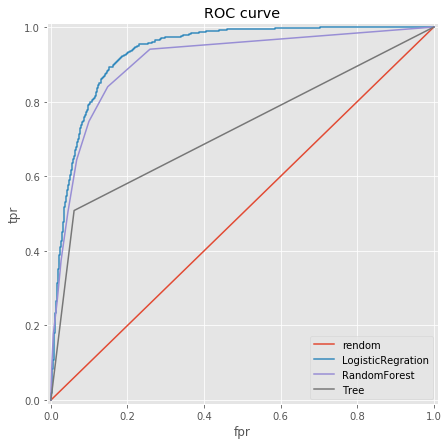

In [662]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lpredict_proba[:,1])

plt.figure(figsize=(7, 7))
# линия рандома
plt.plot([0, 1], [0, 1])

# линия логистической регрессии
plt.plot(fpr, tpr)

# линия случайного леса
fpr2, tpr2, thresholds2 = roc_curve(y_test, rpredict_proba[:,1])
plt.plot(fpr2, tpr2)

# линия дерева
fpr3, tpr3, thresholds3 = roc_curve(y_test, tpredict_proba[:,1])
plt.plot(fpr3, tpr3)

plt.legend(['rendom', 'LogisticRegration', 'RandomForest', 'Tree'])

plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [648]:
roc_auc_score(y_test, lpredict_proba[:,1])

0.9328431834323951

In [573]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
#rfc = RandomForestClassifier()

cross_val_score(
    lmodel,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)

array([0.93561772, 0.91385952, 0.92870209, 0.92760154, 0.93741727,
       0.94108184, 0.93565458, 0.93386554, 0.92095135, 0.93124962])

In [651]:
predict = lmodel.predict(df_test_preproc)                  # делаем предсказание

predict_proba = lmodel.predict_proba(df_test_preproc)

In [654]:
predict_proba[:, 1].size

16476

In [655]:
df_smpl['target'] = predict_proba[:, 1]

In [656]:
df_smpl.to_csv('submission.csv', index = False)